In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## GET DATA

In [ ]:
!pip install app-store-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 892.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into

In [ ]:
from app_store_scraper import AppStore
from pprint import pprint
from datetime import datetime


app = AppStore(country="id", app_name="MyPertamina")
app.review(how_many=2000)

filtered_reviews = [review for review in app.reviews if datetime(2023, 12, 25) < review['date'] < datetime(2024, 3, 25)]

pprint(filtered_reviews)
pprint(len(filtered_reviews))

[{'date': datetime.datetime(2024, 1, 1, 9, 54, 16),
  'isEdited': False,
  'rating': 1,
  'review': 'Saya mendaftarkan aplikasi ini utk orang tua saya. Saya berbeda '
            'kota dengan orang tua saya. Bersyukur kota yang saya tinggali '
            'tidak peru menggunkan aplikasi ini. Orang tua saya gaptek '
            'sehingga saya bantu utk mendaftarkan dan mengajari cara '
            'pemakaian. Ntah kenapa, aplikasi ini sangat ngeleg dan minta '
            'direset. Sy beberapa kali mereset dan gagal dengan tampilan '
            '“undefined is not an object (evaluating '
            '\'(0,F.$o)("tempAreaAdministrative")[b]” Kalau memang wajib pakai '
            'aplikasi ini utk mengisi BBM, cobalah utk meningkatkan performa '
            'aplikasi ini terlebih dahulu. Dan siapkan petugas di SPBU yang '
            'siap dimintai tolong utk membantu menggunakan aplikasi.',
  'title': 'Sangat buruk',
  'userName': 'pertaminj'},
 {'date': datetime.datetime(2024, 3, 21, 2

In [ ]:
import csv
from app_store_scraper import AppStore
from datetime import datetime
from pprint import pprint

# app = AppStore(country="id", app_name="MyPertamina")
# app.review(how_many=100)

# # Filter reviews based on date
# filtered_reviews = [review for review in app.reviews if datetime(2023, 12, 25) < review['date'] < datetime(2024, 3, 25)]

# Define CSV file path
csv_file_path = "/content/drive/MyDrive/Magang/DDB/sentiment mypertamina/appStore_filtered_reviews.csv"

# Define CSV headers
csv_headers = ['Title', 'Rating', 'Review', 'User Name', 'Date', 'Is Edited']

# Write reviews to CSV file
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=csv_headers)

    # Write headers
    writer.writeheader()

    # Write reviews
    for review in filtered_reviews:
        writer.writerow({
            'Title': review.get('title', ''),
            'Rating': review.get('rating', ''),
            'Review': review.get('review', ''),
            'User Name': review.get('userName', ''),
            'Date': review.get('date', '').strftime('%Y-%m-%d %H:%M:%S'),
            'Is Edited': review.get('isEdited', '')
        })

print("Data berhasil disimpan ke dalam file CSV:", csv_file_path)

Data berhasil disimpan ke dalam file CSV: /content/drive/MyDrive/Magang/DDB/sentiment mypertamina/appStore_filtered_reviews.csv


## Preprocessing

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Magang/DDB/sentiment mypertamina/appStore_filtered_reviews.csv')

In [ ]:
df.head(25)

,Title,Rating,Review,User Name,Date,Is Edited
0,Sangat buruk,1,Saya mendaftarkan aplikasi ini utk orang tua s...,pertaminj,2024-01-01 09:54:16,False
1,Server error terus pas mau bayar via QR,1,Tolong diperbaiki layanannya. Sudah beberapa k...,Dika012,2024-03-21 02:47:42,False
2,Aplikasi dak jelas,1,"Aplikasi dak jelas, udah daftar tapi masih aja...",Evans sanders,2024-03-21 00:33:31,False
3,Barcode eror,1,Sering eror !,canter125,2024-03-17 20:49:05,False
4,APLIKASI SAMPAH,1,"Daftar udah, tapu nunggu verifikasi lebih dari...",ANGGA PEBRIAN,2024-03-17 11:44:51,False
5,GA BISA REGISTER KENDARAAN,1,Aplikasi apa ini? dsuruh daftar utk BBM subsid...,GR34T Apps,2024-03-16 15:43:38,False
6,3 Months can’t scan all outlet Balikpapan,1,I dunno why Can’t even scan all Balikpapan Out...,Kariem Makarie,2024-03-14 11:06:34,False
7,pemanfaatan big data,1,"upload ktp- masuk di perbankan- pajak, data b...",okgasokgas,2024-03-13 00:41:48,False
8,Interface nya bikin pusing gak sih?,1,Emang kita gak punya yah UI designer anak bang...,Iqbaliban,2024-03-09 14:43:53,False
9,Ga ada Cs yang bisa di kontak,1,Telp 135 maupun via aplikasi cuman di sambut s...,Andreas Yang,2024-03-09 06:24:26,False


In [ ]:
df = df[['Review','Date']]
df.head()

,Review,Date
0,Saya mendaftarkan aplikasi ini utk orang tua s...,2024-01-01 09:54:16
1,Tolong diperbaiki layanannya. Sudah beberapa k...,2024-03-21 02:47:42
2,"Aplikasi dak jelas, udah daftar tapi masih aja...",2024-03-21 00:33:31
3,Sering eror !,2024-03-17 20:49:05
4,"Daftar udah, tapu nunggu verifikasi lebih dari...",2024-03-17 11:44:51


In [ ]:
df.shape

(79, 2)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.dropna()
df.head()

,Review,Date
0,Saya mendaftarkan aplikasi ini utk orang tua s...,2024-01-01 09:54:16
1,Tolong diperbaiki layanannya. Sudah beberapa k...,2024-03-21 02:47:42
2,"Aplikasi dak jelas, udah daftar tapi masih aja...",2024-03-21 00:33:31
3,Sering eror !,2024-03-17 20:49:05
4,"Daftar udah, tapu nunggu verifikasi lebih dari...",2024-03-17 11:44:51


In [ ]:
df.shape

(79, 2)

In [ ]:
import re

In [ ]:
def clean_twitter_text(text):
  # delete mention
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)

  # deleting hashtag
  text = re.sub(r'#\w+', '', text)

  # delete retweet
  text = re.sub(r'RT[\s]+','', text)

  # delete url
  text = re.sub(r'https?://\S+', '', text)

  # delete character non-alfanumerik (hapus tanda baca)
  text = re.sub(r'[^A-Za-z ]', '', text)

  # hapus spasi berlebihan
  text = re.sub(r'\s+', ' ', text).strip()

  # hapus emoticon
  emoticon_pattern = r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251\U0001f926-\U0001f937\U0001F1E0-\U0001F1FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251\U0001f926-\U0001f937\U00010000-\U0010ffff]+'
  text = re.sub(emoticon_pattern, '', text)

  # hapus tanda baca
  # text = re.sub("[^\w\s]", "", text)

  return text

df['Review'] = df['Review'].apply(clean_twitter_text)

In [ ]:
df.head()

,Review,Date
0,Saya mendaftarkan aplikasi ini utk orang tua s...,2024-01-01 09:54:16
1,Tolong diperbaiki layanannya Sudah beberapa ka...,2024-03-21 02:47:42
2,Aplikasi dak jelas udah daftar tapi masih aja ...,2024-03-21 00:33:31
3,Sering eror,2024-03-17 20:49:05
4,Daftar udah tapu nunggu verifikasi lebih dari ...,2024-03-17 11:44:51


In [ ]:
df['Review'] = df['Review'].str.lower()

In [ ]:
df.head()

,Review,Date
0,saya mendaftarkan aplikasi ini utk orang tua s...,2024-01-01 09:54:16
1,tolong diperbaiki layanannya sudah beberapa ka...,2024-03-21 02:47:42
2,aplikasi dak jelas udah daftar tapi masih aja ...,2024-03-21 00:33:31
3,sering eror,2024-03-17 20:49:05
4,daftar udah tapu nunggu verifikasi lebih dari ...,2024-03-17 11:44:51


## Normalisasi

In [ ]:
norm = {"yg": "yang",
    "ganjar": "",
    "prabowo": "",
    "gak": "tidak",
    "ga": "tidak",
    "nggak": "tidak",
    "bangetdari": "banget dari",
    "prabowo": "",
    "vibes": "suasana",
    "klen": "kalian",
    "tuk": "untuk",
    "kalo": "kalau",
    "kk": "kakak",
    "alesan": "alasan",
    "alesan": "alasan",
    "cth": "contoh",
    "nanya": "tanya",
    "tdk": "tidak",
    "ktp": "kartu tanda penduduk",
    # "jg": "juga",
    # "kmrn": "kemarin",
    # "mending": "lebih baik",
    # "yth": "kepada",
    # "krg": "kurang",
    # "skrg": "sekarang",
    # "jgn": "jangan",
    # "sll": "selalu",
    # "yg": "yang",
    # "gt": "begitu",
    # "wkwk": "haha",
    # "aja": "saja",
    # "dgn": "dengan",
    # "dst": "dan seterusnya",
    # "gtu": "begitu",
    # "bgt": "banget",
    # "gk": "tidak",
    # "dlm": "dalam",
    # "bgtu": "begitu",
    # "dpt": "dapat",
    # "d": "di",
    # "lg": "lagi",
    # "gpp": "tidak apa-apa",
    # "tp": "tapi",
    # "sm": "sama",
    # "gw": "saya",
    # "lu": "kamu",
    # "bkn": "bukan",
    # "km": "kamu",
    # "bsk": "besok",
    # "trs": "terus",
    # "gt": "begitu",
    # "brg": "barang",
    # "lgi": "lagi",
    # "bs": "bisa",
    # "jg": "juga",
    # "emg": "memang",
    # "ad": "ada",
    # "bsk": "besok",
    # "krg": "kurang",
    # "yg": "yang",
    # "gpp": "tidak apa-apa",
    # "bgt": "banget",
    # "y": "ya",
    # "dr": "dari",
    # "smp": "sampai",
    # "kyk": "kayak",
    # "smua": "semua",
    # "ky": "kayak",
    # "yg": "yang",
    # "pdhl": "padahal",
    # "hrs": "harus",
    # "tp": "tapi",
    # "spt": "seperti",
    # "gpp": "tidak apa-apa",
    # "tp": "tapi",
    # "kyknya": "kayaknya",
    # "ntr": "nanti",
    # "td": "tadi",
    # "brp": "berapa",
    # "sih": "sih",
    # "lgs": "langsung",
    # "pd": "pada",
    # "jg": "juga",
    # "skr": "sekarang",
    # "sll": "selalu",
    # "bgmn": "bagaimana",
    # "dmn": "di mana",
    # "krn": "karena",
    # "lwt": "lewat",
    # "nih": "ini",
    # "bsk": "besok",
    # "td": "tadi",
    # "srg": "sering",
    # "n": "dan",
    # "jg": "juga",
    # "hr": "hari",
    # "tmn": "teman",
    # "bwh": "bawah",
    # "sptny": "sepertinya",
    # "spti": "seperti",
    # "cm": "cuma",
    # "ms": "masyarakat",
    # "tnp": "tanpa",
    # "bbrp": "beberapa",
    # "skali": "sangat",
    # "mrk": "mereka",
    # "bngt": "banget",
    # "mr": "mister",
    # "bkn": "bukan",
    # "tmpt": "tempat",
    # "byk": "banyak",
    # "dlmnya": "dalamnya",
    # "kpd": "kepada",
    # "pgn": "pengin",
    # "krja": "kerja",
    # "dngn": "dengan",
    # "hrs": "harus",
    # "kl": "kalau",
    # "klw": "kalau",
    # "klwrg": "keluarga",
    # "kpn": "kapan",
    # "stlh": "setelah",
    # "dl": "dulu",
    # "nge": "meng-",
    # "yaa": "ya",
    # "yg": "yang",
    # "nggak": "tidak",
    # "gitu": "begitu",
    # "kmn": "kemana",
    # "sih": "sih",
    # "ko": "kok",
    # "bs": "bisa",
    # "dgn": "dengan",
    # "d": "di",
    # "sini": "di sini",
    # "dpt": "dapat",
    # "kt": "kata",
    # "jdi": "jadi",
    # "mcm": "macam",
    # "shg": "sehingga",
    # "lbh": "lebih",
    # "tnpa": "tanpa",
    # "smpe": "sampai",
    # "tiap": "setiap",
    # "sesuai": "sesuai",
    # "jd": "jadi",
    # "tr": "ter",
    # "it": "itu",
    # "klh": "kalah",
    # "td": "tadi",
    # "hny": "hanya",
    # "yg": "yang",
    # "sblm": "sebelum",
    # "dgn": "dengan",
    # "msh": "masih",
    # "dgn": "dengan",
    # "tnp": "tanpa",
    # "wktu": "waktu",
    # "tkt": "takut",
    # "dlm": "dalam",
    # "Ngelegg": "Lambat",
    # "Gaptek": "Gagap teknologi",
    # "Dong": "Sungguh",
    # "Nunggu": "Menunggu",
    # "Ribet": "Rumit",
    # "Dak jelas": "Tidak jelas",
    # "Tingkah": "Berulah",
    # "Ngeborong": "Memborong",
    # "Dsuruh": "Disuruh",
    # "Payah": "Buruk",
    # "Lawak": "Lucu",
    # "Emang": "Memang",
    # "Gampang": "Mudah",
    # "Emosi": "Marah",
    # "Ditunggu": "Di tunggu",
    # "Dulu": "Dahulu",
    # "Dongo": "Bodoh",
    # "Auto": "Otomatis",
    # "Ke-back": "Kembali",
    # "Dipertimbangkan": "Dipertimbangkan",
    # "Nutup": "Menutup",
    # "Ga guna": "Tidak berguna",
    # "Ga niat": "Tidak niat",
    # "Ga bisa": "Tidak bisa",
    # "Ga kepake": "Tidak dipakai",
    # "Ke-block": "Diblokir",
    # "Ribet-ribet": "Rumit",
    # "Nge-reset": "Mereset",
    # "Gede": "Besar",
    # "Nge-lemot": "Lambat",
    # "Nge-close": "Tutup sendiri",
    # "Gombal": "Bohong",
    # "Nge-reset": "Mereset",
    # "Nge-hang": "Macet",
    # "Sssiiaallaann": "Sangat lambat",
    # "Siiaapp": "Siap",
    # "Tampilan makin kece": "Tampilan semakin bagus",
    # "Claim": "Klaim",
    # "afk": "away from keyboard",
    # "bae": "before anyone else",
    # "bruh": "brother",
    # "btw": "by the way",
    # "chill": "relax",
    # "cringe": "embarrass",
    # "fam": "family",
    # "finna": "fixing to",
    # "fleek": "on point",
    # "fomo": "fear of missing out",
    # "ftfy": "fixed that for you",
    # "gtg": "got to go",
    # "hmu": "hit me up",
    # "idk": "I don't know",
    # "ikr": "I know, right?",
    # "ily": "I love you",
    # "imho": "in my humble opinion",
    # "irl": "in real life",
    # "jk": "just kidding",
    # "kys": "kill yourself (used sarcastically)",
    # "lmao": "laughing my ass off",
    # "lit": "excited",
    # "lol": "laughing out loud",
    # "lowkey": "not really",
    # "no cap": "no lie",
    # "np": "no problem",
    # "ofc": "of course",
    # "omg": "oh my God",
    # "on fleek": "on point",
    # "op": "overpowered",
    # "otp": "one true pairing",
    # "plz": "please",
    # "prty": "party",
    # "rdy": "ready",
    # "salty": "bitter",
    # "smh": "shaking my head",
    # "srs": "serious",
    # "stfu": "shut the f*ck up",
    # "tbh": "to be honest",
    # "tfw": "that feeling when",
    # "thnx": "thanks",
    # "tldr": "too long, didn't read",
    # "tho": "though",
    # "tmw": "tomorrow",
    # "ttyl": "talk to you later",
    # "vibing": "feeling good",
    # "v chill": "very relaxed",
    # "wknd": "weekend",
    # "wtf": "what the f*ck",
    # "wtv": "whatever",
    # "yaaas": "yes",
    # "yolo": "you only live once",
    # "y u no": "why don't you",
    "dunno" : "I Dont Know",
    "tapu" : "tetapi",

  }

In [ ]:
def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['Review'] = df['Review'].apply(lambda x : normalisasi(x))
df.head(10)

,Review,Date
0,saya mendaftarkan aplikasi ini utk orang tua s...,2024-01-01 09:54:16
1,tolong diperbaiki layanannya sudah beberapa ka...,2024-03-21 02:47:42
2,aplikasi dak jelas udah daftar tapi masih aja ...,2024-03-21 00:33:31
3,sering eror,2024-03-17 20:49:05
4,daftar udah tetapi nunggu verifikasi lebih dar...,2024-03-17 11:44:51
5,aplikasi apa ini dsuruh daftar utk bbm subsidi...,2024-03-16 15:43:38
6,i I Dont Know why cant even scan all balikpapa...,2024-03-14 11:06:34
7,upload kartu tanda penduduk masuk di perbankan...,2024-03-13 00:41:48
8,emang kita tidak punya yah ui designer anak ba...,2024-03-09 14:43:53
9,telp maupun via aplikasi cuman di sambut sama ...,2024-03-09 06:24:26


## Stopwords

In [ ]:
more_stop_words = [
    "tidak",
    "a",
    "about",
    "above",
    "across",
    "after",
    "again",
    "against",
    "all",
    "almost",
    "alone",
    "along",
    "already",
    "also",
    "although",
    "always",
    "among",
    "an",
    "and",
    "another",
    "any",
    "are",
    "around",
    "as",
    "at",
    "away",
    "be",
    "because",
    "been",
    "before",
    "behind",
    "being",
    "below",
    "beneath",
    "beside",
    "between",
    "beyond",
    "both",
    "but",
    "by",
    "can",
    "cannot",
    "could",
    "couldn't",
    "day",
    "did",
    "didn't",
    "do",
    "does",
    "doesn't",
    "doing",
    "down",
    "during",
    "each",
    "either",
    "else",
    "enough",
    "even",
    "ever",
    "every",
    "everyone",
    "everything",
    "everywhere",
    "except",
    "few",
    "for",
    "from",
    "further",
    "get",
    "got",
    "had",
    "has",
    "have",
    "having",
    "he",
    "her",
    "here",
    "hers",
    "herself",
    "him",
    "himself",
    "his",
    "how",
    "however",
    "i",
    "if",
    "in",
    "into",
    "is",
    "it",
    "its",
    "itself",
    "just",
    "keep",
    "know",
    "known",
    "last",
    "later",
    "least",
    "less",
    "let",
    "like",
    "likely",
    "little",
    "long",
    "look",
    "made",
    "make",
    "making",
    "man",
    "many",
    "may",
    "me",
    "mean",
    "might",
    "more",
    "most",
    "much",
    "must",
    "my",
    "myself",
    "near",
    "need",
    "neither",
    "never",
    "new",
    "next",
    "no",
    "none",
    "nor",
    "not",
    "now",
    "of",
    "off",
    "often",
    "on",
    "once",
    "only",
    "or",
    "other",
    "ought",
    "our",
    "ours",
    "ourselves",
    "out",
    "over",
    "own",
    "past",
    "per",
    "perhaps",
    "please",
    "plus",
    "put",
    "rather",
    "really",
    "regarding",
    "said",
    "same",
    "saw",
    "say",
    "saying",
    "seems",
    "seen",
    "self",
    "sell",
    "sent",
    "she",
    "should",
    "since",
    "so",
    "some",
    "something",
    "sometimes",
    "somewhere",
    "soon",
    "still",
    "such",
    "sure",
    "take",
    "taken",
    "than",
    "that",
    "the",
    "their",
    "them",
    "themselves",
    "then",
    "there",
    "these",
    "they",
    "this",
    "those",
    "though",
    "through",
    "throughout",
    "to",
    "too",
    "toward",
    "towards",
    "under",
    "tidak",
    'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya',
    'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila',
    'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya',
    'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik',
    'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah',
    'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum',
    'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa',
    'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan',
    'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berkenaan',
    'berlainan', 'berlalu', 'berlangsung', 'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula',
    'bersama', 'bersama-sama', 'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut',
    'bertutur', 'berujar', 'berupa', 'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa',
    'bisakah', 'boleh', 'bolehkah', 'bolehlah', 'buat', 'bukan', 'bukankah', 'bukanlah', 'bukannya', 'bulan', 'bung',
    'cara', 'caranya', 'cukup', 'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada',
    'datang', 'dekat', 'demi', 'demikian', 'demikianlah', 'dengan', 'depan', 'di', 'dia', 'diakhiri', 'diakhirinya',
    'dialah', 'diantara', 'diantaranya', 'diberi', 'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat',
    'didatangkan', 'digunakan', 'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab',
    'dijelaskan', 'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui', 'diketahuinya',
    'dikira', 'dilakukan', 'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan', 'dimaksudkannya', 'dimaksudnya', 'diminta',
    'dimintai', 'dimisalkan', 'dimulai', 'dimulailah', 'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat',
    'diperbuatnya', 'dipergunakan', 'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan',
    'dipertanyakan', 'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya',
    'disini', 'disinilah', 'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan',
    'ditujukan', 'ditunjuk', 'ditunjuki', 'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 'dituturkan', 'dituturkannya',
    'diucapkan', 'diucapkannya', 'diungkapkan', 'dong', 'dua', 'dulu', 'empat', 'enggak', 'enggaknya', 'entah',
    'entahlah', 'guna', 'gunakan', 'hal', 'hampir', 'hanya', 'hanyalah', 'hari', 'harus', 'haruslah', 'harusnya',
    'hendak', 'hendaklah', 'hendaknya', 'hingga', 'ia', 'ialah', 'ibarat', 'ibaratkan', 'ibaratnya', 'ibu', 'ikut',
    'ingat', 'ingat-ingat', 'ingin', 'inginkah', 'inginkan', 'ini', 'inikah', 'inilah', 'itu', 'itukah', 'itulah',
    'jadi', 'jadilah', 'jadinya', 'jangan', 'jangankan', 'janganlah', 'jauh', 'jawab', 'jawaban', 'jawabnya',
    'jelas', 'jelaskan', 'jelaslah', 'jelasnya', 'jika', 'jikalau', 'juga', 'jumlah', 'jumlahnya', 'justru',
    'kala', 'kalau', 'kalaulah', 'kalaupun', 'kalian', 'kami', 'kamilah', 'kamu', 'kamulah', 'kan', 'kapan',
    'kapankah', 'kapanpun', 'karena']

In [ ]:
# library buat mengubah kata-kata berimbuhan ke kata dasarnya dan menghapus dan, serta, dll
!pip install sastrawi

In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary


stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['Review'] = df["Review"].apply(lambda x : stopword(x))
df

,Review,Date
0,mendaftarkan aplikasi utk orang tua berbeda ko...,2024-01-01 09:54:16
1,diperbaiki layanannya beberapa kali mau bayar ...,2024-03-21 02:47:42
2,aplikasi dak udah daftar masih aja ribet dak l...,2024-03-21 00:33:31
3,sering eror,2024-03-17 20:49:05
4,daftar udah nunggu verifikasi lebih hari nungg...,2024-03-17 11:44:51
...,...,...
74,user interface lebih simple skrg terlalu lemot...,2023-12-30 12:00:52
75,aplikasi ssiiaallaann,2023-12-27 07:42:52
76,adain fitur point bisa diuntuker voucher bensin,2023-12-26 13:32:36
77,makin update makin jelas reset code claim bisa,2023-12-26 00:23:28


## Tokenize

In [ ]:
tokenized = df['Review'].apply(lambda x : x.split())
tokenized

0     [mendaftarkan, aplikasi, utk, orang, tua, berb...
1     [diperbaiki, layanannya, beberapa, kali, mau, ...
2     [aplikasi, dak, udah, daftar, masih, aja, ribe...
3                                        [sering, eror]
4     [daftar, udah, nunggu, verifikasi, lebih, hari...
                            ...                        
74    [user, interface, lebih, simple, skrg, terlalu...
75                             [aplikasi, ssiiaallaann]
76    [adain, fitur, point, bisa, diuntuker, voucher...
77    [makin, update, makin, jelas, reset, code, cla...
78    [ditingkatkan, spbu, dapat, menerima, pembayar...
Name: Review, Length: 79, dtype: object

## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []

  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)

  d_clean = []
  d_clean = " ".join(do)

  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)
tokenized.to_csv("/content/drive/MyDrive/Magang/DDB/sentiment mypertamina/HasilProcessingMypertamina.csv", index=False)

daftar aplikasi utk orang tua beda kota dentidakn orang tua syukur kota tingtidakli peru gun aplikasi orang tua saya tidakptek sehingtidak saya bantu utk daftar mentidakjari pakai ntah aplikasi santidakt ngeleg minta direset sy kali mereset tidaktidakl dentidakn tampil undefined not object evaluating fotempareaadministrativeb memang wajib pakai aplikasi utk isi bbm coba utk tingkat performa aplikasi lebih dan siap petutidaks spbu siap tolong utk bantu guna aplikasi
baik layan beberapa kali mau bayar pakai qr error terus
aplikasi dak udah daftar masih aja ribet dak lagi bangka belitung kota kecil tingkah jkt mending beli di vivo biar bangkrut sekali pertamina banyak banget tingkah ntidaklahin netidakra maju
sering eror
daftar udah nunggu verifikasi lebih hari nunggu qr aja bisa bilang nik temu dongo
aplikasi dsuruh daftar utk bbm subsidi tp gilir mau tambah kendara muncul jadi error serverkejadian ini sudah dr bulan lalu tunggu kira baik nyata nihil
i dont know why cant scan balikpapan 

## translate

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Magang/DDB/sentiment mypertamina/HasilProcessingMypertamina.csv", encoding='latin1')
data.head(10)

,Review
0,daftar aplikasi utk orang tua beda kota dentid...
1,baik layan beberapa kali mau bayar pakai qr er...
2,aplikasi dak udah daftar masih aja ribet dak l...
3,sering eror
4,daftar udah nunggu verifikasi lebih hari nungg...
5,aplikasi dsuruh daftar utk bbm subsidi tp gili...
6,i dont know why cant scan balikpapan outlet ba...
7,upload kartu tanda duduk masuk perban pajak da...
8,emang tidak punya yah ui designer anak bangsa ...
9,telp maupun via aplikasi cuman sambut sama rob...


In [ ]:
!pip install deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 701.9 kB/s eta 0:00:00


In [ ]:
from deep_translator import GoogleTranslator

def convert_eng(tweet):
    translator = GoogleTranslator(source='id', target='en')
    translation = translator.translate(tweet)
    return translation


data['tweet_english'] = data['Review'].apply(convert_eng)

In [ ]:
data.to_csv("/content/drive/MyDrive/Magang/DDB/sentiment mypertamina/mypertaminaTranslate.csv")

In [ ]:
data.head()

,Review,tweet_english
0,daftar aplikasi utk orang tua beda kota dentid...,List of applications for parents from differen...
1,baik layan beberapa kali mau bayar pakai qr er...,good service several times want to pay using q...
2,aplikasi dak udah daftar masih aja ribet dak l...,"I haven't registered the application, it's sti..."
3,sering eror,error often
4,daftar udah nunggu verifikasi lebih hari nungg...,"I've registered, I've been waiting for verific..."


In [ ]:
data.shape

(79, 2)

## labelling

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Magang/DDB/sentiment mypertamina/mypertaminaTranslate.csv", index_col=0)
data.shape

(79, 2)

In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []

total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')

    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')

    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

In [ ]:
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 32
Netral = 30
Negatif = 17

Total Data : 79


In [ ]:
data['klasifikasi'] = status
data.head(5)

,Review,tweet_english,klasifikasi
0,daftar aplikasi utk orang tua beda kota dentid...,List of applications for parents from differen...,Positif
1,baik layan beberapa kali mau bayar pakai qr er...,good service several times want to pay using q...,Positif
2,aplikasi dak udah daftar masih aja ribet dak l...,"I haven't registered the application, it's sti...",Positif
3,sering eror,error often,Netral
4,daftar udah nunggu verifikasi lebih hari nungg...,"I've registered, I've been waiting for verific...",Positif


## Visualisasi

In [ ]:
import matplotlib.pyplot as plt

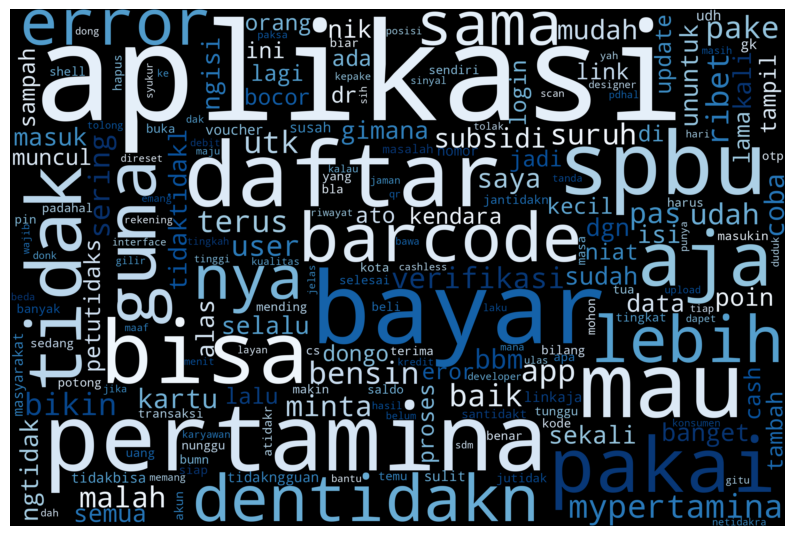

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in data['Review']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations = False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

0.8
0.8
0.8


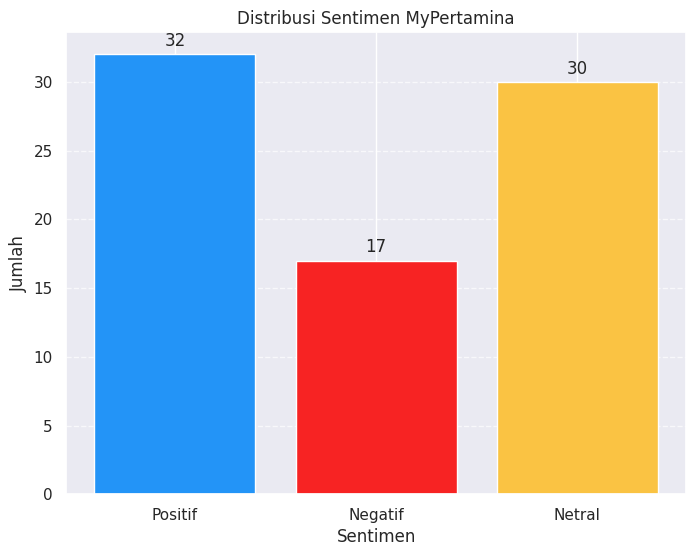

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()

        print(bar.get_width())
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center',
                    va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)


    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen MyPertamina")

## Klasifikasi Sentimen

In [ ]:
data

,Review,tweet_english,klasifikasi
0,daftar aplikasi utk orang tua beda kota dentid...,List of applications for parents from differen...,Positif
1,baik layan beberapa kali mau bayar pakai qr er...,good service several times want to pay using q...,Positif
2,aplikasi dak udah daftar masih aja ribet dak l...,"I haven't registered the application, it's sti...",Positif
3,sering eror,error often,Netral
4,daftar udah nunggu verifikasi lebih hari nungg...,"I've registered, I've been waiting for verific...",Positif
...,...,...,...
74,user interface lebih simple skrg terlalu lot t...,the user interface is simpler now too many app...,Positif
75,aplikasi ssiiaallaann,ssiiaallaann app,Netral
76,adain fitur point bisa diuntuker voucher bensin,There is a point feature that can be exchanged...,Netral
77,makin update makin jelas reset code claim bisa,"The more updates, the clearer it becomes to re...",Positif


In [ ]:
dataset = data.drop(['Review'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if (n[1] == 'Positif'):
        set_positif.append(n)
    elif (n[1] == 'Negatif'):
        set_positif.append(n)
    else:
        set_positif.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
    train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
c1 = NaiveBayesClassifier(train_set)
print('Akurasi Test: ', c1.accuracy(dataset))

Akurasi Test:  0.6582278481012658


In [ ]:
# Labelling
data_tweet = list(data['tweet_english'])
polaritas = 0

total = 0

status = []
total_positif = total_negatif = total_netral = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=c1)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Negatif':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal data = {total}')


Hasil Analisis Data
Positif = 19
Netral = 6
Negatif = 54

Total data = 79


In [ ]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
data['klasifikasi_bayes'] = status

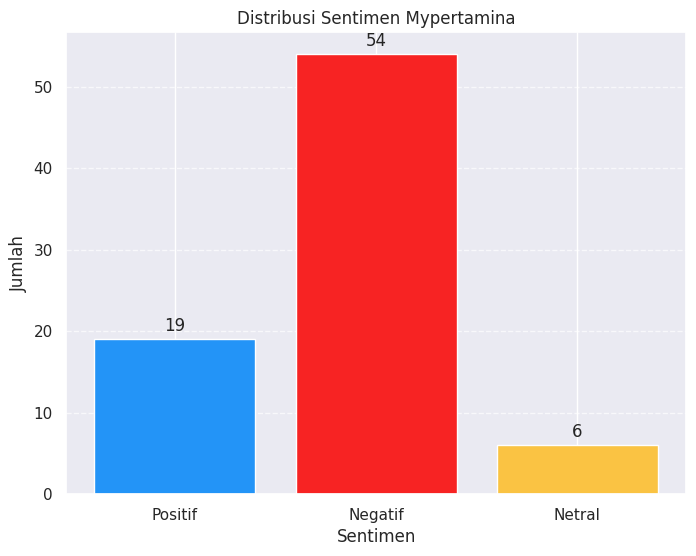

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()

        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center',
                    va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)


    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Mypertamina")

In [ ]:
data

,Review,tweet_english,klasifikasi,klasifikasi_bayes
0,daftar aplikasi utk orang tua beda kota dentid...,List of applications for parents from differen...,Positif,Positif
1,baik layan beberapa kali mau bayar pakai qr er...,good service several times want to pay using q...,Positif,Netral
2,aplikasi dak udah daftar masih aja ribet dak l...,"I haven't registered the application, it's sti...",Positif,Netral
3,sering eror,error often,Netral,Netral
4,daftar udah nunggu verifikasi lebih hari nungg...,"I've registered, I've been waiting for verific...",Positif,Netral
...,...,...,...,...
74,user interface lebih simple skrg terlalu lot t...,the user interface is simpler now too many app...,Positif,Netral
75,aplikasi ssiiaallaann,ssiiaallaann app,Netral,Netral
76,adain fitur point bisa diuntuker voucher bensin,There is a point feature that can be exchanged...,Netral,Netral
77,makin update makin jelas reset code claim bisa,"The more updates, the clearer it becomes to re...",Positif,Netral


In [ ]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f'Text : {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]} \n')

    else:
        print('Tuple tidak memiliki cukup element')

Text : baik layan beberapa kali mau bayar pakai qr error terus
Classifier: Positif
Classifier Bayes: Netral 

Text : aplikasi dak udah daftar masih aja ribet dak lagi bangka belitung kota kecil tingkah jkt mending beli di vivo biar bangkrut sekali pertamina banyak banget tingkah ntidaklahin netidakra maju
Classifier: Positif
Classifier Bayes: Netral 

Text : daftar udah nunggu verifikasi lebih hari nunggu qr aja bisa bilang nik temu dongo
Classifier: Positif
Classifier Bayes: Netral 

Text : aplikasi dsuruh daftar utk bbm subsidi tp gilir mau tambah kendara muncul jadi error serverkejadian ini sudah dr bulan lalu tunggu kira baik nyata nihil
Classifier: Positif
Classifier Bayes: Netral 

Text : emang tidak punya yah ui designer anak bangsa bisa ntidaksih interface sesuai dgn user yah jantidakn designer nya jutidak ngimpor expat dr netidakra api
Classifier: Positif
Classifier Bayes: Netral 

Text : ribet banget mau daftar barcode subsidi tepatverifikasi akun udah hasil tingtidakl verifi

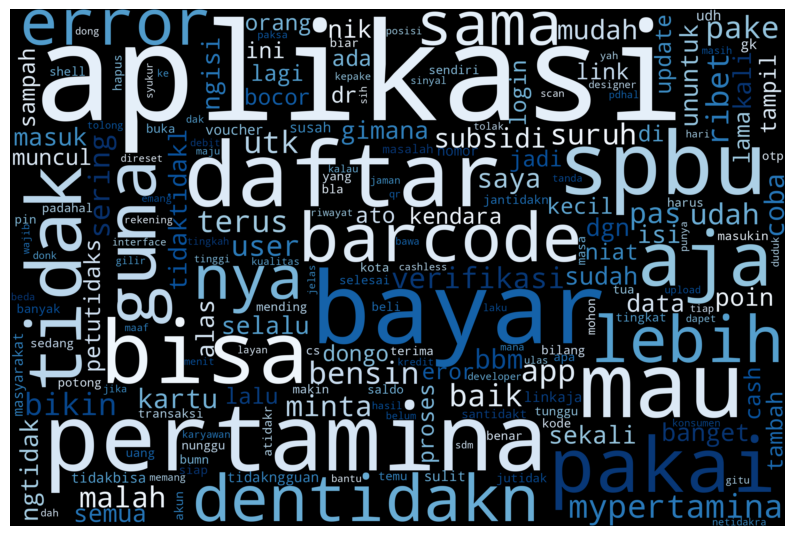

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in data['Review']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations = False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

In [ ]:
data.to_csv('/content/drive/MyDrive/Magang/DDB/sentiment mypertamina/final_appstore.csv')